In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
#%matplotlib notebook

## Histogram of Oriented Gradients (HOG)

This project uses HOG and Linear SVM to detect the cars in a stream of video

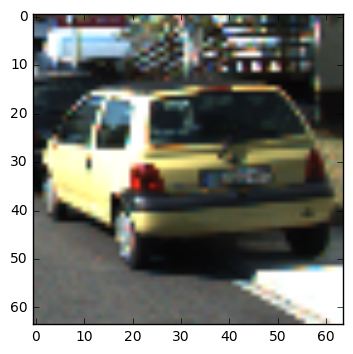

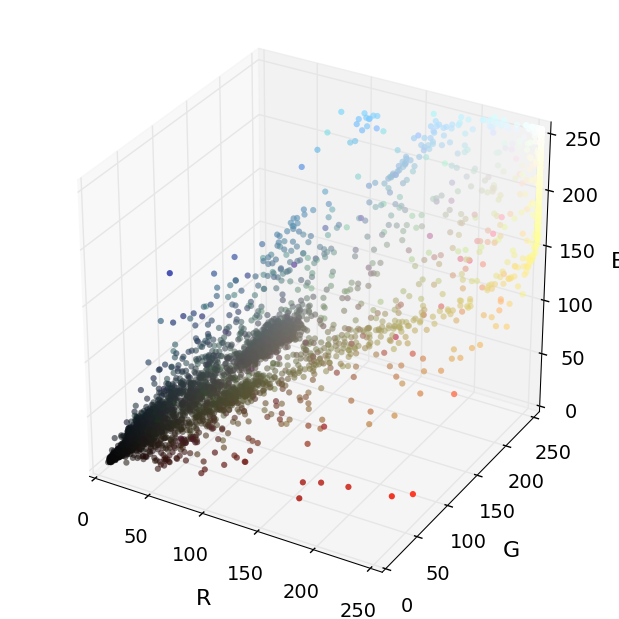

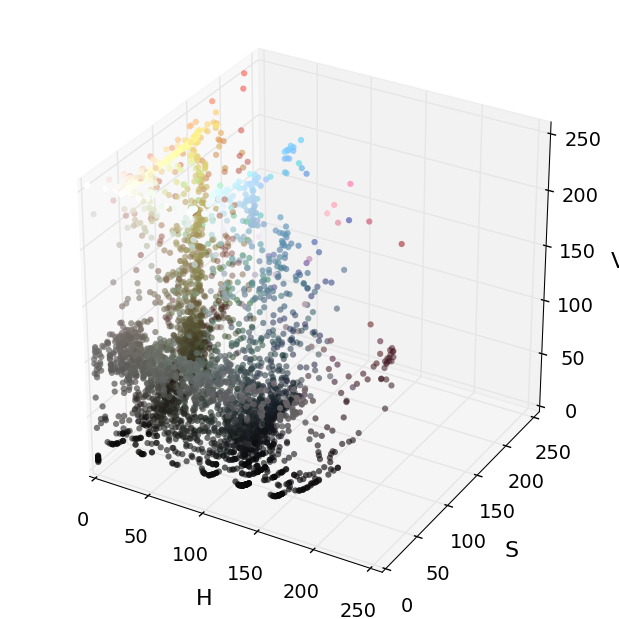

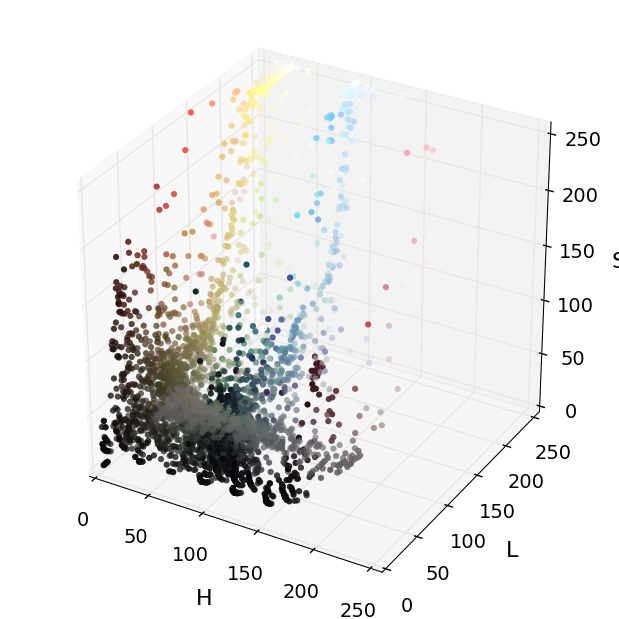

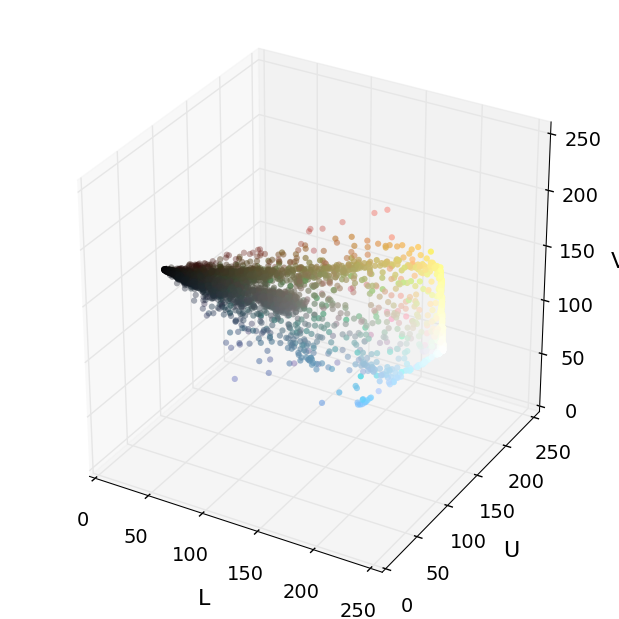

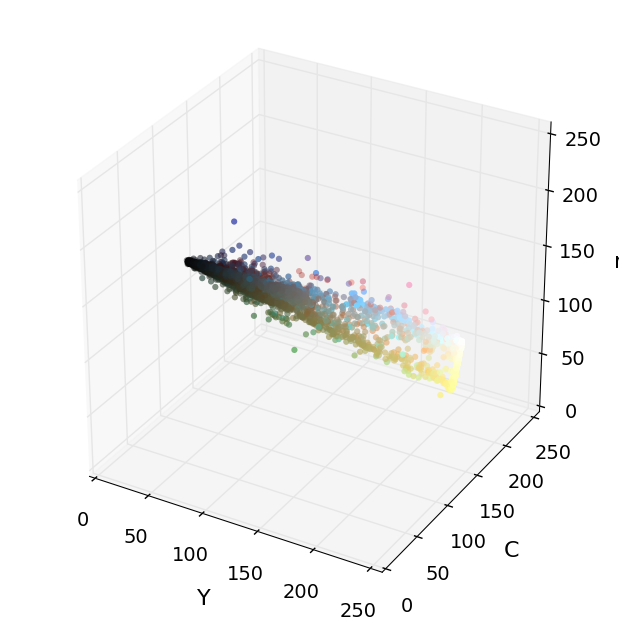

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=[(0, 255), (0, 255), (0, 255)]):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(6, 6))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation

for imf in ["./25.png"]: #["./2.png","./3.png","./8.png","./25.png","./31.png","./53.png"]:
    # Read a color image
    img = cv2.imread(imf)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Select a small fraction of pixels to plot by subsampling it
    scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
    img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

    # Convert subsampled image to desired color space(s)
    img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
    img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
    img_small_HLS = cv2.cvtColor(img_small, cv2.COLOR_BGR2HLS)
    img_small_LUV = cv2.cvtColor(img_small, cv2.COLOR_BGR2LUV)
    img_small_YCrCb = cv2.cvtColor(img_small, cv2.COLOR_BGR2YCrCb)

    img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

    plt.imshow(img_RGB)
    plt.show()
    # Plot and show
    
    ax = plot3d(img_small_RGB, img_small_rgb)
    plt.show()
    plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
    plt.show()
    plot3d(img_small_HLS, img_small_rgb, axis_labels=list("HLS"))
    plt.show()
    plot3d(img_small_LUV, img_small_rgb, axis_labels=list("LUV"))
    plt.show()
    plot3d(img_small_YCrCb, img_small_rgb, axis_labels=list("YCrCb"))
    plt.show()
    # for angle in range(0, 360):
    #     ax.view_init(30, angle)
    #     plt.draw()
    #     plt.pause(.001)


    
    
    plt.show()

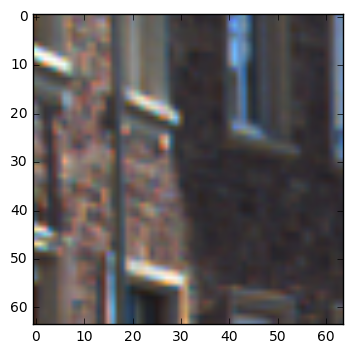

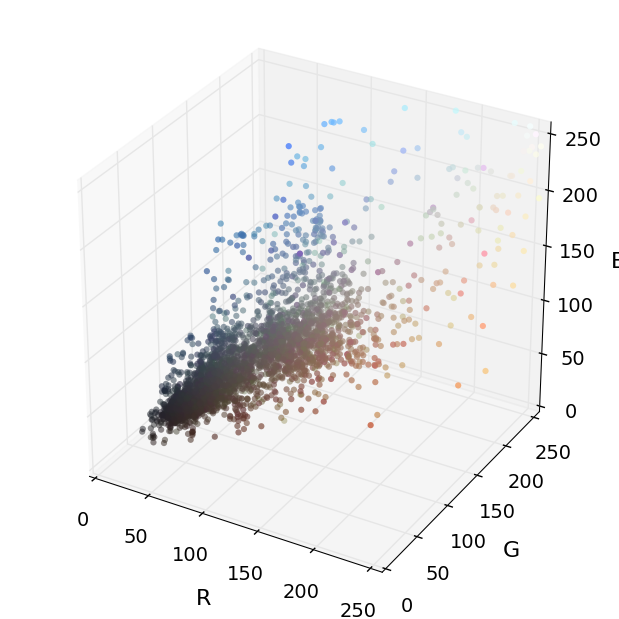

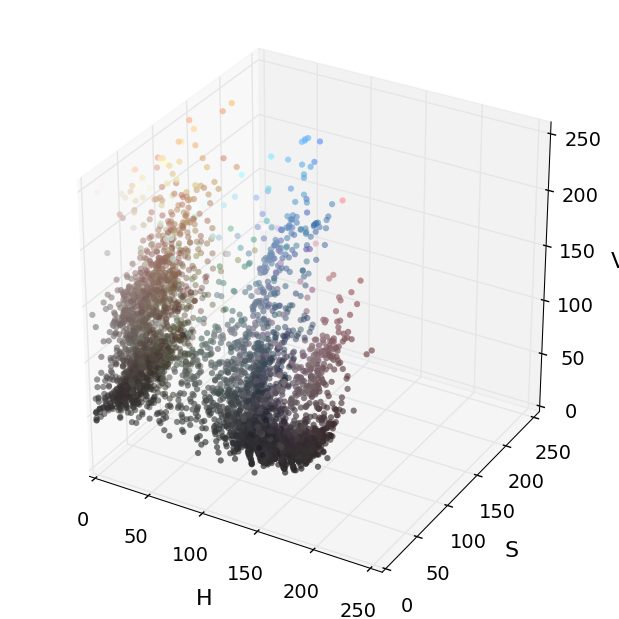

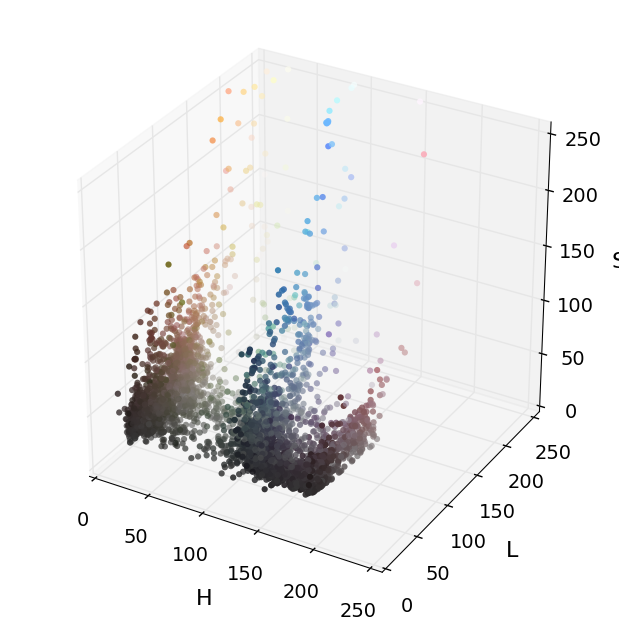

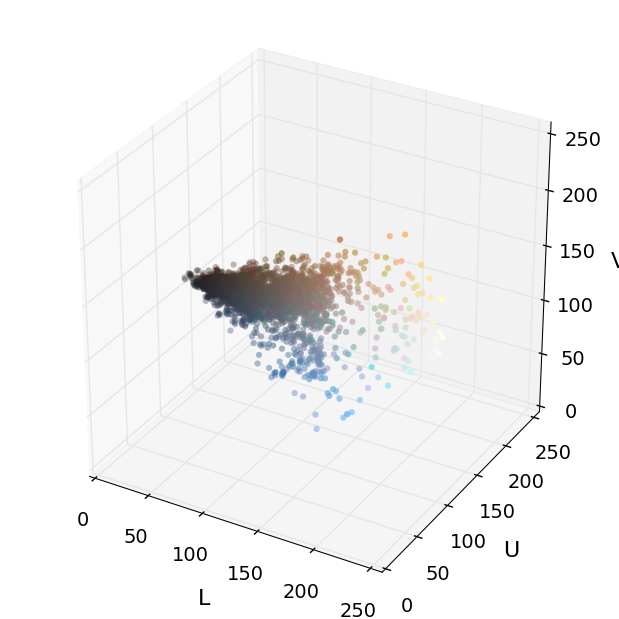

In [4]:
for imf in ["./3.png"]: #["./2.png","./3.png","./8.png","./25.png","./31.png","./53.png"]:
    # Read a color image
    img = cv2.imread(imf)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Select a small fraction of pixels to plot by subsampling it
    scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
    img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

    # Convert subsampled image to desired color space(s)
    img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
    img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
    img_small_HLS = cv2.cvtColor(img_small, cv2.COLOR_BGR2HLS)
    img_small_LUV = cv2.cvtColor(img_small, cv2.COLOR_BGR2LUV)

    img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

    plt.imshow(img_RGB)
    plt.show()
    # Plot and show
    
    ax = plot3d(img_small_RGB, img_small_rgb)
    plt.show()
    plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
    plt.show()
    plot3d(img_small_HLS, img_small_rgb, axis_labels=list("HLS"))
    plt.show()
    plot3d(img_small_LUV, img_small_rgb, axis_labels=list("LUV"))
    plt.show()
    # for angle in range(0, 360):
    #     ax.view_init(30, angle)
    #     plt.draw()
    #     plt.pause(.001)


    
    
    plt.show()

### ALL methods that were used in the excercises

In [5]:
import matplotlib.image as mpimg
import numpy as np
import cv2
from skimage.feature import hog
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features 
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,int(hog_channel)], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    print(np.shape(features))
    return features
    
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy


### HOG visualization

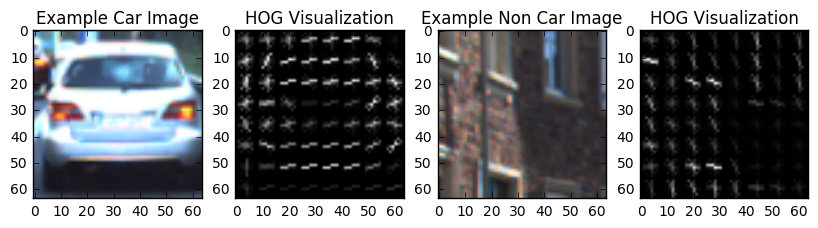

In [32]:
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 0 # Can be 0, 1, 2, or "ALL"
spatial_size = (32,32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [400, 656] # Min and max in y to search in slide_window()

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import interact, IntSlider, RadioButtons,FloatSlider

# hog orientation ranges from 5 to 14

hogOrient_slider = IntSlider(min=5, max=14, step=1, value=9)
hogChannel_buttons = RadioButtons(options=['0', '1', '2',"ALL"])
pixelPerCell_slider = IntSlider(min=6,max=10,step=1,value=8)

img_car = cv2.imread("./31.png")
img_not_car = cv2.imread("./3.png")

#img = cv2.cvtColor(img_clr, cv2.COLOR_BGR2GRAY)
# decorate the plot function with an environment from the UIs:
@interact(orient=hogOrient_slider, hog_channel=hogChannel_buttons,pixel_per_cell=pixelPerCell_slider)
def plot(orient, pixel_per_cell,hog_channel):
    img = cv2.cvtColor(img_car, cv2.COLOR_BGR2YCrCb)
    if(hog_channel=="ALL"):
        img = cv2.cvtColor(img_car, cv2.COLOR_BGR2GRAY)
    else:
        img = img[:,:,int(hog_channel)]
    image = cv2.cvtColor(img_car, cv2.COLOR_BGR2RGB)
    features, hog_image= get_hog_features(img, orient, pixel_per_cell, cell_per_block, 
                        vis=True, feature_vec=True)
    fig = plt.figure(figsize=(10,10))
    plt.subplot(141)
    plt.imshow(image)
    plt.title('Example Car Image')
    plt.subplot(142)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Visualization')
    
    img = cv2.cvtColor(img_not_car, cv2.COLOR_BGR2YCrCb)
    if(hog_channel=="ALL"):
        img = cv2.cvtColor(img_not_car, cv2.COLOR_BGR2GRAY)
    else:
        img = img[:,:,int(hog_channel)]
    image = cv2.cvtColor(img_not_car, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img_not_car, cv2.COLOR_BGR2GRAY)
    features, hog_image= get_hog_features(img, orient, pixel_per_cell, cell_per_block, 
                        vis=True, feature_vec=True)
    
    plt.subplot(143)
    plt.title('Example Non Car Image')
    
    plt.imshow(image)
    plt.subplot(144)
    plt.title('HOG Visualization')
    plt.imshow(hog_image, cmap='gray')
    



In [9]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
# from lesson_functions import *

In [28]:
### TODO: Tweak these parameters and see how the results change.
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 6 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (32,32) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [400, 656] # Min and max in y to search in slide_window()

In [39]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
# from lesson_functions import *
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
# from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

# Define a function to extract features from a single image window
# This function is very similar to extract_features()
# just for a single image rather than list of images
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows

### Linear SVC training

(3000, 11868)
(3000, 11868)
4800
1200
Using: 9 orientations 6 pixels per cell and 2 cells per block
Feature vector length: 11868
2.94 Seconds to train SVC...
Test Accuracy of SVC =  0.99
(720, 1280, 3)


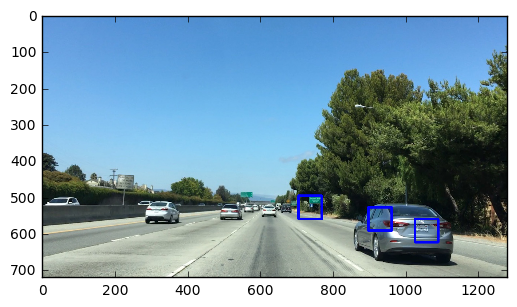

In [28]:

    
    
# Read in cars and notcars
car_images = glob.glob('vehicles/*/*.*')
non_car_images = glob.glob('non-vehicles/*/*.*')
cars = []
notcars = []
for image in car_images:
    cars.append(image)
for image in non_car_images:
    notcars.append(image)

# Reduce the sample size because
# The quiz evaluator times out after 13s of CPU time
import random
random.shuffle(cars)
random.shuffle(notcars)
sample_size = 3000

cars = cars[0:sample_size]
notcars = notcars[0:sample_size]

### TODO: Tweak these parameters and see how the results change.
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 6 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (32,32) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [400, 656] # Min and max in y to search in slide_window()

car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)
print(len(y_train))
print(len(y_test))

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()

image = mpimg.imread('./bbox-example-image.jpg')
draw_image = np.copy(image)
print(draw_image.shape)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
image = image.astype(np.float32)/255
xy_window = (64,64) #(128,128)
windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=xy_window, xy_overlap=(0.5, 0.5))

hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    
import pickle
plt.imshow(window_img)
dct = {}
dct["svc"] = svc
dct["scaler"] = X_scaler
dct["orient"] = orient
dct["pix_per_cell"] = pix_per_cell
dct["cell_per_block"] = cell_per_block
dct["spatial_size"] = spatial_size
dct["hist_bins"] = hist_bins

pickle.dump(dct,open("svc_pickle.p","wb"))


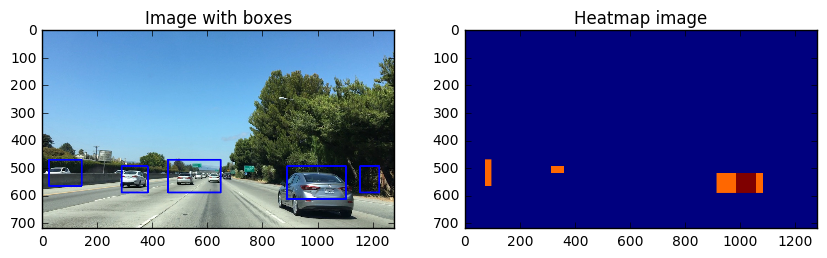

In [26]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy.ndimage.measurements import label
import cv2
#from lesson_functions import *
image = mpimg.imread('./bbox-example-image.jpg')
dist_pickle = pickle.load( open("svc_pickle.p", "rb" ) )
svc = dist_pickle["svc"]
X_scaler = dist_pickle["scaler"]
orient = dist_pickle["orient"]
pix_per_cell = dist_pickle["pix_per_cell"]
cell_per_block = dist_pickle["cell_per_block"]
spatial_size = dist_pickle["spatial_size"]
hist_bins = dist_pickle["hist_bins"]
boxes_img = []


img = mpimg.imread('./bbox-example-image.jpg')
img = mpimg.imread('./test_images/test1.jpg')
import numpy as np
import cv2
from skimage.feature import hog

heatmap = np.zeros_like(image[:,:,0]).astype(np.float)

def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)

def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=False, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=False, 
                       visualise=vis, feature_vector=feature_vec)
        return features

def bin_spatial(img, size=(32, 32)):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    return np.hstack((color1, color2, color3))
                        
def color_hist(img, nbins=32):    #bins_range=(0, 256)
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features



# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    heatmap = np.zeros_like(image[:,:,0]).astype(np.float)
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell)-1
    nyblocks = (ch1.shape[0] // pix_per_cell)-1 
    nfeat_per_block = orient*cell_per_block**2
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell)-1 
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            #print(np.shape(test_features))
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6)
                boxes_img.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw, ytop_draw+win_draw+ystart)))
                heatmap[ytop_draw+ystart: ytop_draw+ystart+win_draw, xbox_left: xbox_left+win_draw] += 1
                
    return draw_img,heatmap

# Read in image similar to one shown above 

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

# # Add heat to each box in box list
# heatmap = add_heat(heatmap,boxes_img)
    
# # Apply threshold to help remove false positives
# heat = apply_threshold(heatmap,2)

# # Visualize the heatmap when displaying    
# heatmap = np.clip(heat, 0, 255)
    
ystart = 400
ystop = 656
scale = 1.5

imgs = glob.glob("./test_images/*")
import random
i = random.randint(0,len(imgs)-1)
img = mpimg.imread(imgs[i])
img = mpimg.imread('./bbox-example-image.jpg')

hogOrient_slider = IntSlider(min=5, max=14, step=1, value=9)
hogChannel_buttons = RadioButtons(options=['0', '1', '2',"ALL"])
pixelPerCell_slider = IntSlider(min=6,max=10,step=1,value=8)
scale_slider = FloatSlider(min=0.5, max=5.0, step=0.1, value=1.5)


@interact(orient=hogOrient_slider, 
          hog_channel=hogChannel_buttons,
          pixel_per_cell=pixelPerCell_slider,
          scale=scale_slider)
def plot(orient, pixel_per_cell,hog_channel,scale):    
    out_img,heatmap = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    heatmap = apply_threshold(heatmap, 1)
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(img), labels)
    fig = plt.figure(figsize=(10,10))
    plt.subplot(121)
    plt.title("Image with boxes")
    plt.imshow(draw_img)
    plt.subplot(122)
    plt.title("Heatmap image")
    heatmap = apply_threshold(heatmap,3)
    plt.imshow(heatmap)
    

In [20]:
heatmaps = []
boxes = []
scale = 1.5
def process_image(img):
    out_img,heatmap = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    heatmaps.append(heatmap)
    thresholded = apply_threshold(np.mean(heatmaps[-5:], axis=0), 4)
    labels = label(thresholded)
    draw_img = draw_labeled_bboxes(np.copy(img), labels)
    
    labels[0]
    return np.hstack([draw_img,labels[0]])

In [21]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML
from IPython.display import display
# output = 'test_output.mp4'
# clip1 = VideoFileClip("test_video.mp4")
output = 'output2.mp4'
clip1 = VideoFileClip("test_video.mp4")

output_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time output_clip.write_videofile(output, audio=False)

[MoviePy] >>>> Building video output2.mp4
[MoviePy] Writing video output2.mp4




  0%|          | 0/39 [00:00<?, ?it/s]

  3%|▎         | 1/39 [00:00<00:16,  2.34it/s]

  5%|▌         | 2/39 [00:00<00:15,  2.32it/s]

  8%|▊         | 3/39 [00:01<00:15,  2.34it/s]

 10%|█         | 4/39 [00:01<00:15,  2.31it/s]

 13%|█▎        | 5/39 [00:02<00:14,  2.35it/s]

 15%|█▌        | 6/39 [00:02<00:13,  2.40it/s]

 18%|█▊        | 7/39 [00:02<00:13,  2.38it/s]

 21%|██        | 8/39 [00:03<00:12,  2.45it/s]

 23%|██▎       | 9/39 [00:03<00:14,  2.13it/s]

 26%|██▌       | 10/39 [00:04<00:13,  2.20it/s]

 28%|██▊       | 11/39 [00:04<00:12,  2.27it/s]

 31%|███       | 12/39 [00:05<00:12,  2.19it/s]

 33%|███▎      | 13/39 [00:05<00:11,  2.25it/s]

 36%|███▌      | 14/39 [00:06<00:10,  2.35it/s]

 38%|███▊      | 15/39 [00:06<00:10,  2.40it/s]

 41%|████      | 16/39 [00:07<00:10,  2.12it/s]

 44%|████▎     | 17/39 [00:07<00:10,  2.03it/s]

 46%|████▌     | 18/39 [00:08<00:09,  2.15it/s]

 49%|████▊     | 19/39 [00:08<00:09,  2.22it/s]

 51%|█████▏    | 20/39 [00:08<00:08,

[MoviePy] Done.
[MoviePy] >>>> Video ready: output2.mp4 

CPU times: user 15.1 s, sys: 1.35 s, total: 16.5 s
Wall time: 18.6 s


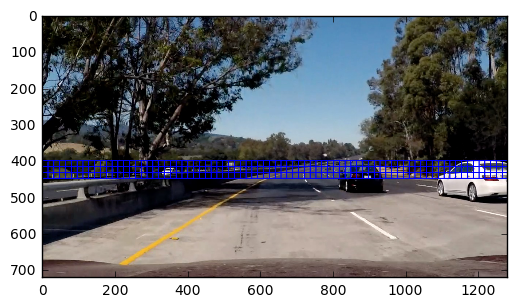

In [108]:
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" #"ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [400, 656] # Min and max in y to search in slide_window()

test_imgs = glob.glob("./test_images/*")
#test_imgs.append("./bbox-example-image.jpg")
import  random
j = random.randint(0,len(test_imgs)-1)
test_image = mpimg.imread(test_imgs[j])
draw_image = np.copy(test_image)


winxy_buttons = RadioButtons(options=[32,64,128])
ystop_buttons = RadioButtons(options=[450,550,656])


#img = cv2.cvtColor(img_clr, cv2.COLOR_BGR2GRAY)
# decorate the plot function with an environment from the UIs:
@interact(winxy=winxy_buttons,ystop=ystop_buttons)
def plot(winxy,ystop):
    y_start_stop = [400,ystop]
    windows = slide_window(test_image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                        xy_window=(winxy,winxy), xy_overlap=(0.5, 0.5))

    hot_windows = search_windows(test_image, windows, svc, X_scaler, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)                       
    window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=2)                    

    plt.imshow(window_img)

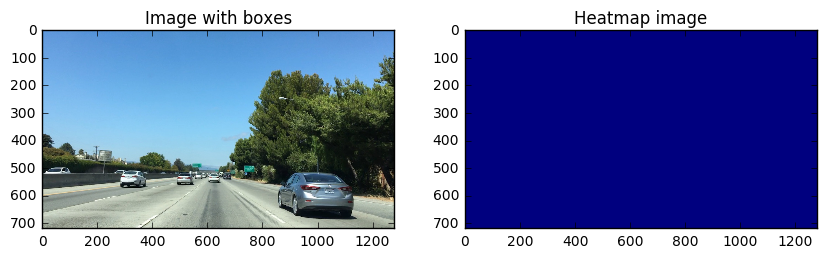

In [109]:
winxy_buttons = RadioButtons(options=[32,64,128])
ystop_buttons = RadioButtons(options=[450,550,656])
@interact(orient=hogOrient_slider, 
          hog_channel=hogChannel_buttons,
          pixel_per_cell=pixelPerCell_slider,
          scale=scale_slider)
def plot(orient, pixel_per_cell,hog_channel,scale):    
    out_img,heatmap = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    heatmap = apply_threshold(heatmap, 1)
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(img), labels)
    fig = plt.figure(figsize=(10,10))
    plt.subplot(121)
    plt.title("Image with boxes")
    plt.imshow(draw_img)
    plt.subplot(122)
    plt.title("Heatmap image")
    heatmap = apply_threshold(heatmap,3)
    plt.imshow(heatmap)

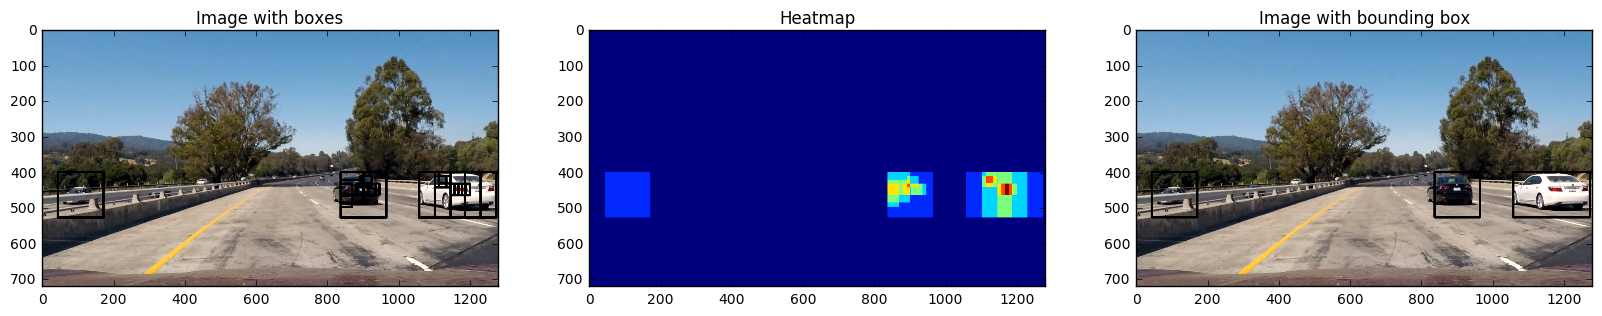

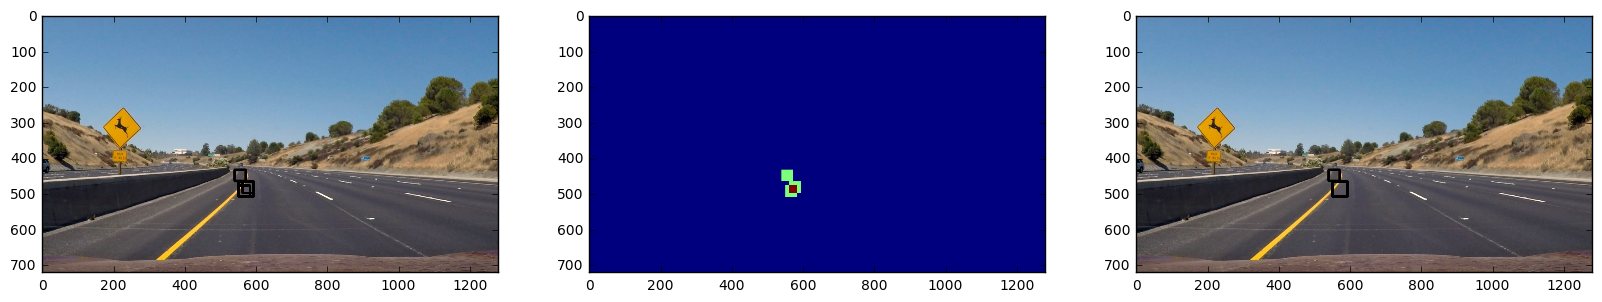

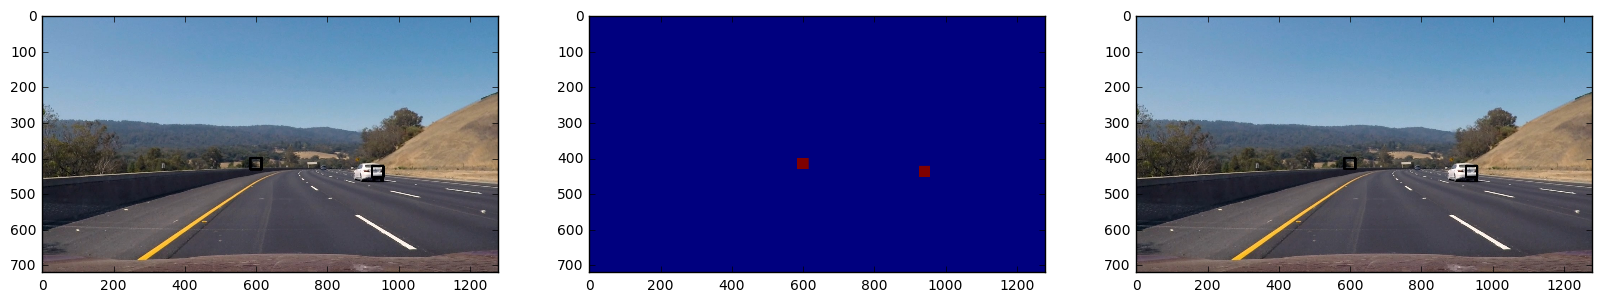

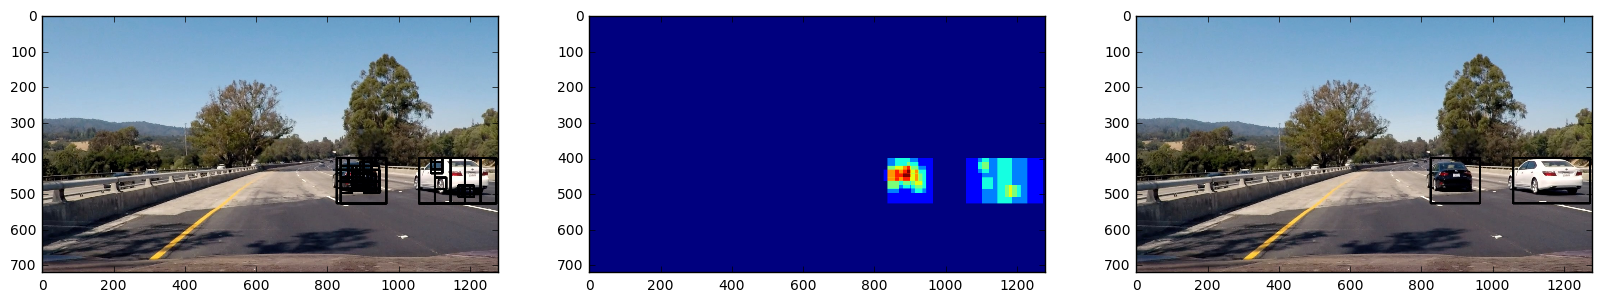

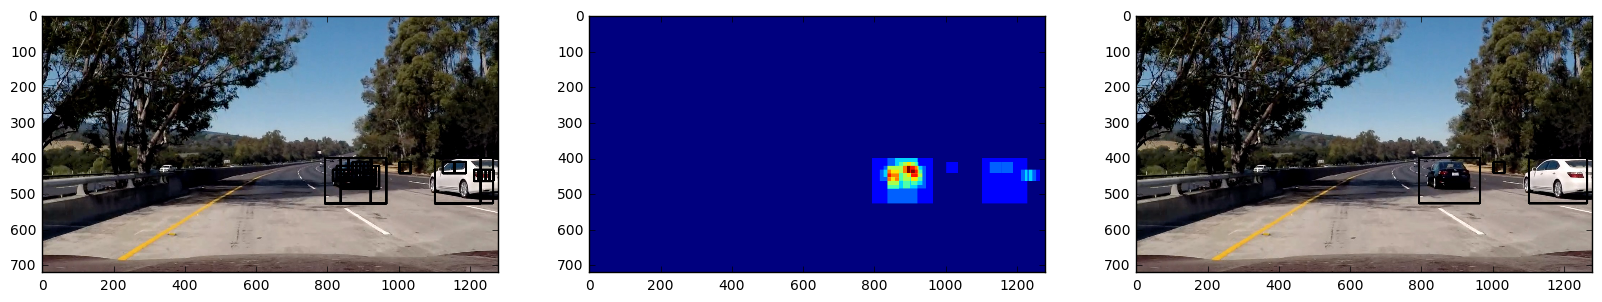

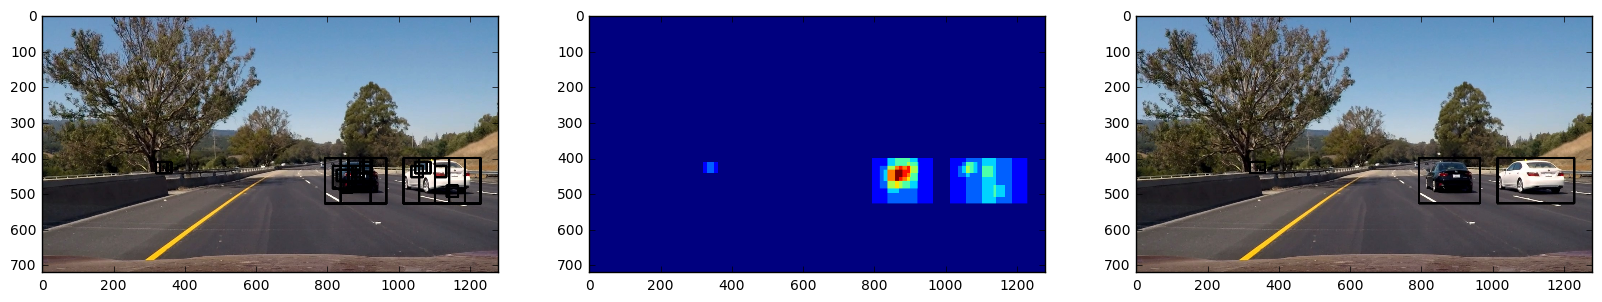

In [111]:
flag= True
for img_path in test_imgs:
    img = mpimg.imread(img_path)
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    h_win =[]
    heatmap = np.zeros_like(image[:,:,0]).astype(np.float)
    for winxy,ystop in [(32,550),(64,550),(128,None)]:
        y_start_stop = [400,ystop]
        windows = slide_window(img, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                               xy_window=(winxy,winxy), xy_overlap=(0.65, 0.65))
        hot_windows = search_windows(img, windows, svc, X_scaler, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)    
        h_win.extend(hot_windows)
    #heatmap = np
    heatmap = add_heat(heatmap,h_win)
    heatmap = apply_threshold(heatmap, 0.95)
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(img), labels)
    window_img = draw_boxes(draw_img, h_win, color=(0, 0, 255), thick=6)
    fig = plt.figure(figsize=(20,10))
    
    plt.subplot(131)
    if(flag):
        plt.title("Image with boxes")
    plt.imshow(window_img)
    plt.subplot(132)
    if(flag):
        plt.title("Heatmap")
    plt.imshow(heatmap)
    plt.subplot(133)
    if(flag):
        plt.title("Image with bounding box")
    plt.imshow(draw_img)
    if(flag):
        flag = False
    
    plt.show()

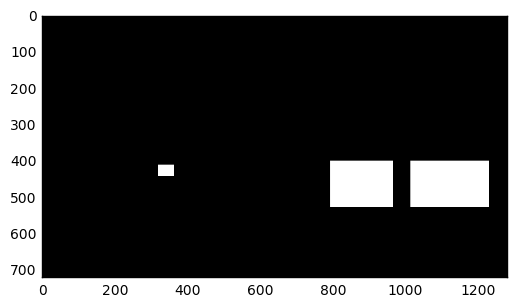

In [114]:
integrated_heatmap = np.zeros_like(image)
integrated_heatmap[heatmap>0]=255
plt.imshow(integrated_heatmap)

In [84]:
heatmaps =  []
def process_image2(image):
    img = image.astype(np.float32)/255
    h_win =[]
    heatmap = np.zeros_like(image[:,:,0]).astype(np.float)
    for winxy,ystop in [(32,550),(64,550),(128,None),(256,None)]:
        y_start_stop = [400,ystop]
        windows = slide_window(img, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                               xy_window=(winxy,winxy), xy_overlap=(0.45, 0.45))
        hot_windows = search_windows(img, windows, svc, X_scaler, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)    
        h_win.extend(hot_windows)
    #heatmap = np
    heatmap = add_heat(heatmap,h_win)
    heatmaps.append(heatmap)
    thresholded = apply_threshold(np.mean(heatmaps[-5:], axis=0), 2.0)
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    #window_img = draw_boxes(draw_img, h_win, color=(0, 0, 255), thick=6)
    return draw_img

In [85]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML
from IPython.display import display
# output = 'test_output.mp4'
# clip1 = VideoFileClip("test_video.mp4")
heatmaps = []
output = 'output2.mp4'
clip1 = VideoFileClip("test_video.mp4")

output_clip = clip1.fl_image(process_image2) #NOTE: this function expects color images!!
%time output_clip.write_videofile(output, audio=False)

[MoviePy] >>>> Building video output2.mp4
[MoviePy] Writing video output2.mp4


 97%|█████████▋| 38/39 [02:10<00:03,  3.39s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output2.mp4 

CPU times: user 2min 7s, sys: 1.34 s, total: 2min 8s
Wall time: 2min 11s


In [73]:
HTML("""
<video width="640" height="480" controls>
  <source src="{0}">
</video>
""".format('output2.mp4'))

#### With multiple scaling rather than windows and winxy 

In [112]:
heatmaps = []
boxes = []
scale = 1.5
def process_image(img):
    heatmap = np.zeros_like(img[:,:,0]).astype(np.float)
    hpre = heatmap
    h_s = []
    for scl in [0.75,1.5]:
        scale = scl
        out_img,heatmap = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
        hpre = np.add(hpre,heatmap) 
    
    heatmaps.append(hpre)
    thresholded = apply_threshold(np.mean(heatmaps[-10:], axis=0), 8)
    labels = label(thresholded)
    draw_img = draw_labeled_bboxes(np.copy(img), labels)
    
    labels[0]
    return draw_img

In [113]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML
from IPython.display import display
# output = 'test_output.mp4'
# clip1 = VideoFileClip("test_video.mp4")
heatmaps = []
output = 'output3.mp4'
clip1 = VideoFileClip("project_video.mp4")

output_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time output_clip.write_videofile(output, audio=False)

[MoviePy] >>>> Building video output3.mp4
[MoviePy] Writing video output3.mp4



  2%|▏         | 26/1261 [01:16<59:38,  2.90s/it]  

KeyboardInterrupt: 